In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập để hiển thị biểu đồ trong notebook (nếu cần)
%matplotlib inline
# Thiết lập để pandas hiển thị tất cả các cột (hữu ích khi có nhiều cột triệu chứng)
pd.set_option('display.max_columns', None)

In [4]:
# Đường dẫn đến file dữ liệu (điều chỉnh nếu cần)
data_path = '../data/raw/synthetic_disease_symptoms.csv' # Giả sử notebook ở trong thư mục 'notebooks/'

# Đọc file CSV vào pandas DataFrame
try:
    df = pd.read_csv(data_path)
    print("Dữ liệu đã được tải thành công!")
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file dữ liệu tại đường dẫn: {data_path}")
    # Bạn có thể dừng ở đây hoặc tạo một DataFrame mẫu để tiếp tục code
    # df = pd.DataFrame() # Ví dụ tạo DataFrame rỗng

Dữ liệu đã được tải thành công!


In [ ]:
if not df.empty:
    # Hiển thị 5 dòng đầu tiên
    print("\n5 dòng đầu tiên của dữ liệu:")
    print(df.head())

    # Hiển thị 5 dòng cuối cùng
    print("\n5 dòng cuối cùng của dữ liệu:")
    print(df.tail())

    # Kích thước của DataFrame (số hàng, số cột)
    print("\nKích thước của DataFrame (hàng, cột):")
    print(df.shape)

    # Thông tin tổng quan về các cột (kiểu dữ liệu, số lượng giá trị không thiếu)
    print("\nThông tin tổng quan về các cột:")
    df.info()

    # Thống kê mô tả cho các cột số (nếu có - trong trường hợp này chủ yếu là 0/1)
    print("\nThống kê mô tả (cho các cột số):")
    # print(df.describe()) # Có thể không quá hữu ích nếu tất cả là 0/1, nhưng vẫn nên xem


5 dòng đầu tiên của dữ liệu:
         diseases  anxiety and nervousness  depression  shortness of breath  \
0  panic disorder                        1           0                    1   
1  panic disorder                        0           0                    1   
2  panic disorder                        1           1                    1   
3  panic disorder                        1           0                    0   
4  panic disorder                        1           1                    0   

   depressive or psychotic symptoms  sharp chest pain  dizziness  insomnia  \
0                                 1                 0          0         0   
1                                 1                 0          1         1   
2                                 1                 0          1         1   
3                                 1                 0          1         1   
4                                 0                 0          0         1   

   abnormal involuntary mo

In [ ]:
if not df.empty:
    print("\nKiểm tra giá trị thiếu trong mỗi cột:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0]) # Chỉ hiển thị các cột có giá trị thiếu
    if missing_values.sum() == 0:
        print("Tuyệt vời! Không có giá trị thiếu nào trong dataset.")
    else:
        print(f"Tổng số giá trị thiếu trong toàn bộ dataset: {missing_values.sum()}")
        # Bạn cần quyết định cách xử lý giá trị thiếu nếu có (ví dụ: điền giá trị, xóa hàng/cột)
        # Với dataset "synthetic" này, khả năng cao là không có giá trị thiếu.


Kiểm tra giá trị thiếu trong mỗi cột:
Series([], dtype: int64)
Tuyệt vời! Không có giá trị thiếu nào trong dataset.



Phân tích biến mục tiêu (diseases):
Số lượng bệnh duy nhất: 773
Danh sách các bệnh duy nhất:
['panic disorder' 'vocal cord polyp' 'turner syndrome' 'cryptorchidism'
 'poisoning due to ethylene glycol' 'atrophic vaginitis'
 'fracture of the hand' 'cellulitis or abscess of mouth'
 'eye alignment disorder' 'headache after lumbar puncture'
 'pyloric stenosis' 'salivary gland disorder' 'osteochondrosis'
 'injury to the knee' 'metabolic disorder' 'vaginitis'
 'sick sinus syndrome' 'tinnitus of unknown cause' 'glaucoma'
 'eating disorder' 'transient ischemic attack' 'pyelonephritis'
 'rotator cuff injury' 'chronic pain disorder' 'problem during pregnancy'
 'liver cancer' 'atelectasis' 'injury to the hand' 'choledocholithiasis'
 'injury to the hip' 'cirrhosis' 'thoracic aortic aneurysm'
 'subdural hemorrhage' 'diabetic retinopathy' 'fibromyalgia'
 'ischemia of the bowel' 'fetal alcohol syndrome' 'peritonitis'
 'injury to the abdomen' 'acute pancreatitis' 'thrombophlebitis' 'asthma'
 'foreign 

C:\Users\DUY SAMA\AppData\Local\Temp\ipykernel_10512\4091414915.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=disease_counts.index[:20], x=disease_counts.values[:20], palette="viridis") # seaborn đẹp hơn


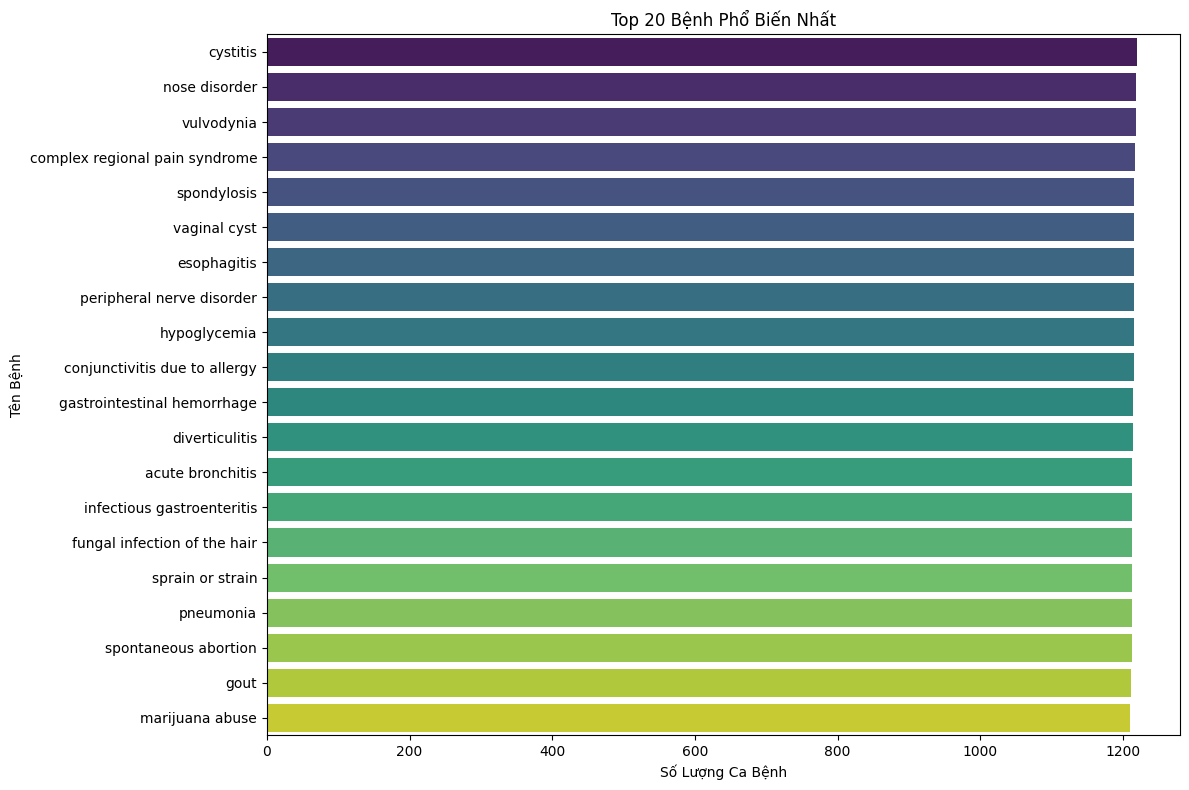


Kiểm tra khả năng mất cân bằng lớp (ví dụ: tỷ lệ của bệnh ít phổ biến nhất so với bệnh phổ biến nhất):
Bệnh phổ biến nhất: cystitis (1219 ca)
Bệnh ít phổ biến nhất: kaposi sarcoma (1 ca)
Tỷ lệ (ít nhất/nhiều nhất): 0.0008
CẢNH BÁO: Có vẻ có sự mất cân bằng lớp đáng kể!


In [8]:
if not df.empty and 'diseases' in df.columns:
    print("\nPhân tích biến mục tiêu (diseases):")

    # Số lượng bệnh duy nhất
    num_unique_diseases = df['diseases'].nunique()
    print(f"Số lượng bệnh duy nhất: {num_unique_diseases}")

    # Liệt kê tên các bệnh duy nhất (nếu không quá nhiều)
    print("Danh sách các bệnh duy nhất:")
    print(df['diseases'].unique())

    # Phân phối của các bệnh (số lần xuất hiện của mỗi bệnh)
    print("\nPhân phối của các bệnh:")
    disease_counts = df['diseases'].value_counts()
    print(disease_counts)

    # Trực quan hóa phân phối bệnh (nếu có nhiều bệnh, có thể chỉ hiển thị top N)
    plt.figure(figsize=(12, 8)) # Điều chỉnh kích thước nếu cần
    # disease_counts.head(20).plot(kind='bar') # Hiển thị top 20 bệnh phổ biến nhất
    sns.barplot(y=disease_counts.index[:20], x=disease_counts.values[:20], palette="viridis") # seaborn đẹp hơn
    plt.title('Top 20 Bệnh Phổ Biến Nhất')
    plt.xlabel('Số Lượng Ca Bệnh')
    plt.ylabel('Tên Bệnh')
    plt.tight_layout() # Điều chỉnh layout cho đẹp
    plt.show()

    # Kiểm tra mất cân bằng lớp
    # Nếu một số bệnh xuất hiện rất ít so với các bệnh khác, đó là dấu hiệu của mất cân bằng lớp
    # Điều này có thể ảnh hưởng đến hiệu suất của model và cần các kỹ thuật xử lý đặc biệt
    # (ví dụ: oversampling, undersampling, sử dụng các chỉ số đánh giá phù hợp như F1-score, AUC-ROC).
    print("\nKiểm tra khả năng mất cân bằng lớp (ví dụ: tỷ lệ của bệnh ít phổ biến nhất so với bệnh phổ biến nhất):")
    if len(disease_counts) > 1:
        print(f"Bệnh phổ biến nhất: {disease_counts.index[0]} ({disease_counts.iloc[0]} ca)")
        print(f"Bệnh ít phổ biến nhất: {disease_counts.index[-1]} ({disease_counts.iloc[-1]} ca)")
        imbalance_ratio = disease_counts.iloc[-1] / disease_counts.iloc[0]
        print(f"Tỷ lệ (ít nhất/nhiều nhất): {imbalance_ratio:.4f}")
        if imbalance_ratio < 0.05: # Ngưỡng ví dụ
             print("CẢNH BÁO: Có vẻ có sự mất cân bằng lớp đáng kể!")


Số lượng cột triệu chứng: 377

Tần suất xuất hiện của các triệu chứng (top 20):
sharp abdominal pain                32307
vomiting                            27874
headache                            24719
cough                               24296
sharp chest pain                    24016
nausea                              23687
back pain                           21809
shortness of breath                 21346
fever                               20394
dizziness                           17272
abnormal appearing skin             16425
nasal congestion                    16200
leg pain                            16189
skin swelling                       15165
depressive or psychotic symptoms    15064
lower abdominal pain                14936
sore throat                         14005
burning abdominal pain              12981
skin rash                           12375
skin lesion                         12340
dtype: int64


C:\Users\DUY SAMA\AppData\Local\Temp\ipykernel_10512\3451360566.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=symptom_frequencies.index[:20], x=symptom_frequencies.values[:20], palette="mako")


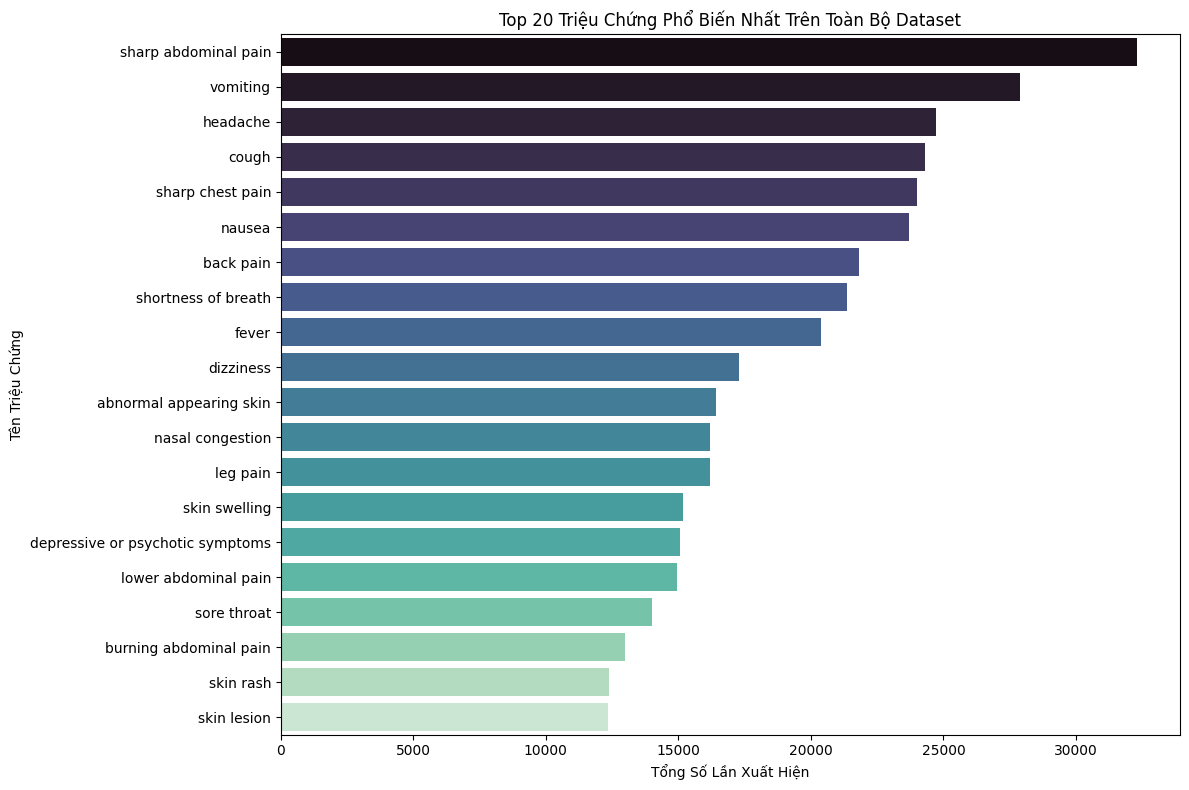

In [ ]:
if not df.empty:
    # Tách các cột triệu chứng
    symptom_columns = [col for col in df.columns if col != 'diseases']
    print(f"\nSố lượng cột triệu chứng: {len(symptom_columns)}")
    # print("Danh sách các cột triệu chứng (ví dụ 10 cột đầu):")
    # print(symptom_columns[:10])

    # Kiểm tra kiểu dữ liệu của các cột triệu chứng (đảm bảo là số, lý tưởng là 0/1)
    # df[symptom_columns].info() # Hoặc xem lại từ df.info() ở trên

    # Xem xét tần suất xuất hiện của từng triệu chứng trên toàn bộ dataset
    # (tổng số lần một triệu chứng được đánh dấu là 1)
    print("\nTần suất xuất hiện của các triệu chứng (top 20):")
    symptom_frequencies = df[symptom_columns].sum().sort_values(ascending=False)
    print(symptom_frequencies.head(20))

    plt.figure(figsize=(12, 8))
    # symptom_frequencies.head(20).plot(kind='bar')
    sns.barplot(y=symptom_frequencies.index[:20], x=symptom_frequencies.values[:20], palette="mako")
    plt.title('Top 20 Triệu Chứng Phổ Biến Nhất Trên Toàn Bộ Dataset')
    plt.xlabel('Tổng Số Lần Xuất Hiện')
    plt.ylabel('Tên Triệu Chứng')
    plt.tight_layout()
    plt.show()

    # Bạn cũng có thể xem xét mối tương quan giữa các triệu chứng (nếu cần thiết, nhưng có thể phức tạp với nhiều triệu chứng)
    correlation_matrix = df[symptom_columns].corr()
    plt.figure(figsize=(15, 12))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm') # annot=True sẽ rất rối
    plt.title('Heatmap Tương Quan Giữa Các Triệu Chứng (Có thể rất lớn)')
    plt.show()
    # Thông thường, với nhiều đặc trưng nhị phân, heatmap tương quan có thể không trực quan lắm.